In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv('uber data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                200000 non-null  object 
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 12.2+ MB


In [2]:
df.isnull()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
199995,False,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False,False
199998,False,False,False,False,False,False,False,False


In [3]:
df.drop(columns="key", inplace=True)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [5]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace = True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(),inplace = True)

In [6]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [7]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [8]:
df = df.assign(hour = df.pickup_datetime.dt.hour,
               day = df.pickup_datetime.dt.day,
               month = df.pickup_datetime.dt.month,
               year = df.pickup_datetime.dt.year,
               dayofweek = df.pickup_datetime.dt.dayofweek)

In [9]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,4.50,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,2009,0
1,16.90,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,2010,1
2,5.70,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0,18,8,2011,3
3,7.70,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,4,21,4,2012,5
4,5.30,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,7,9,3,2010,1
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,8.90,2011-03-24 01:38:50+00:00,-73.989939,40.729423,-73.990683,40.758504,1,1,24,3,2011,3
199996,14.10,2012-06-20 21:36:56+00:00,-74.005021,40.739912,-73.961319,40.766701,3,21,20,6,2012,2
199997,6.90,2012-08-04 19:18:00+00:00,-73.993203,40.752092,-74.003508,40.732282,1,19,4,8,2012,5
199998,18.00,2013-11-26 18:59:21+00:00,-73.994411,40.750884,-73.978532,40.785599,1,18,26,11,2013,1


In [10]:
df = df.drop(["pickup_datetime"], axis =1)
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,4.50,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,2009,0
1,16.90,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,2010,1
2,5.70,-73.982738,40.761270,-73.991242,40.750562,2,0,18,8,2011,3
3,7.70,-73.987130,40.733143,-73.991567,40.758092,1,4,21,4,2012,5
4,5.30,-73.968095,40.768008,-73.956655,40.783762,1,7,9,3,2010,1
...,...,...,...,...,...,...,...,...,...,...,...
199995,8.90,-73.989939,40.729423,-73.990683,40.758504,1,1,24,3,2011,3
199996,14.10,-74.005021,40.739912,-73.961319,40.766701,3,21,20,6,2012,2
199997,6.90,-73.993203,40.752092,-74.003508,40.732282,1,19,4,8,2012,5
199998,18.00,-73.994411,40.750884,-73.978532,40.785599,1,18,26,11,2013,1


In [11]:
# function to calculate the travel distance from the longitudes and latitudes
from math import *
    
def distance_formula(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for pos in range (len(longitude1)):
        lon1, lan1, lon2, lan2 = map(radians, [longitude1[pos], latitude1[pos], longitude2[pos], latitude2[pos]])
        dist_lon = lon2 - lon1
        dist_lan = lan2 - lan1
        
        a = sin(dist_lan/2)**2 + cos(lan1) * cos(lan2) * sin(dist_lon/2)**2
        
        #radius of earth = 6371
        c = 2 * asin(sqrt(a)) * 6371 
        travel_dist.append(c)
            
    return  travel_dist

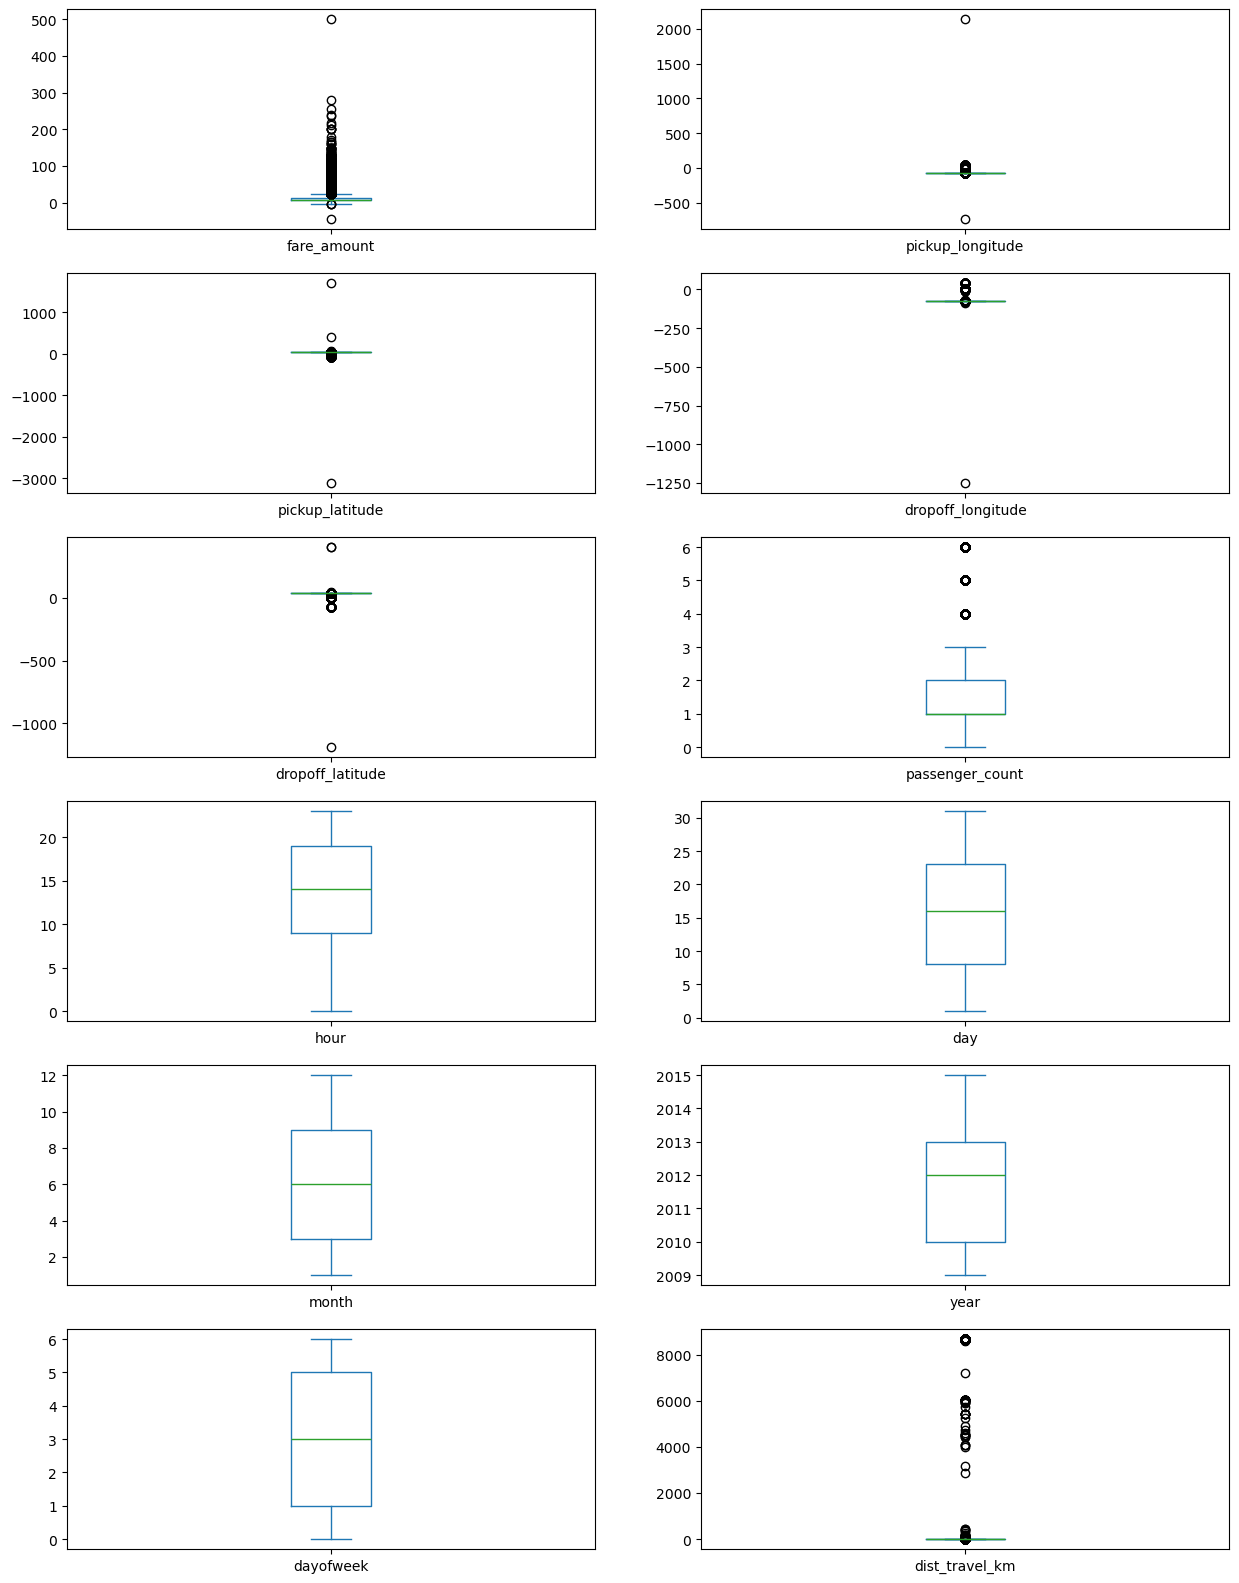

In [13]:
df['dist_travel_km'] = distance_formula(df.pickup_longitude.to_numpy(), df.pickup_latitude.to_numpy(), df.dropoff_longitude.to_numpy(), df.dropoff_latitude.to_numpy())

df.plot(kind = "box",subplots = True,layout = (6,2),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

In [14]:
#Using the InterQuartile Range to fill the values
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

In [15]:
def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df , c)
    return df1

df = treat_outliers_all(df , df.iloc[: , 0::])

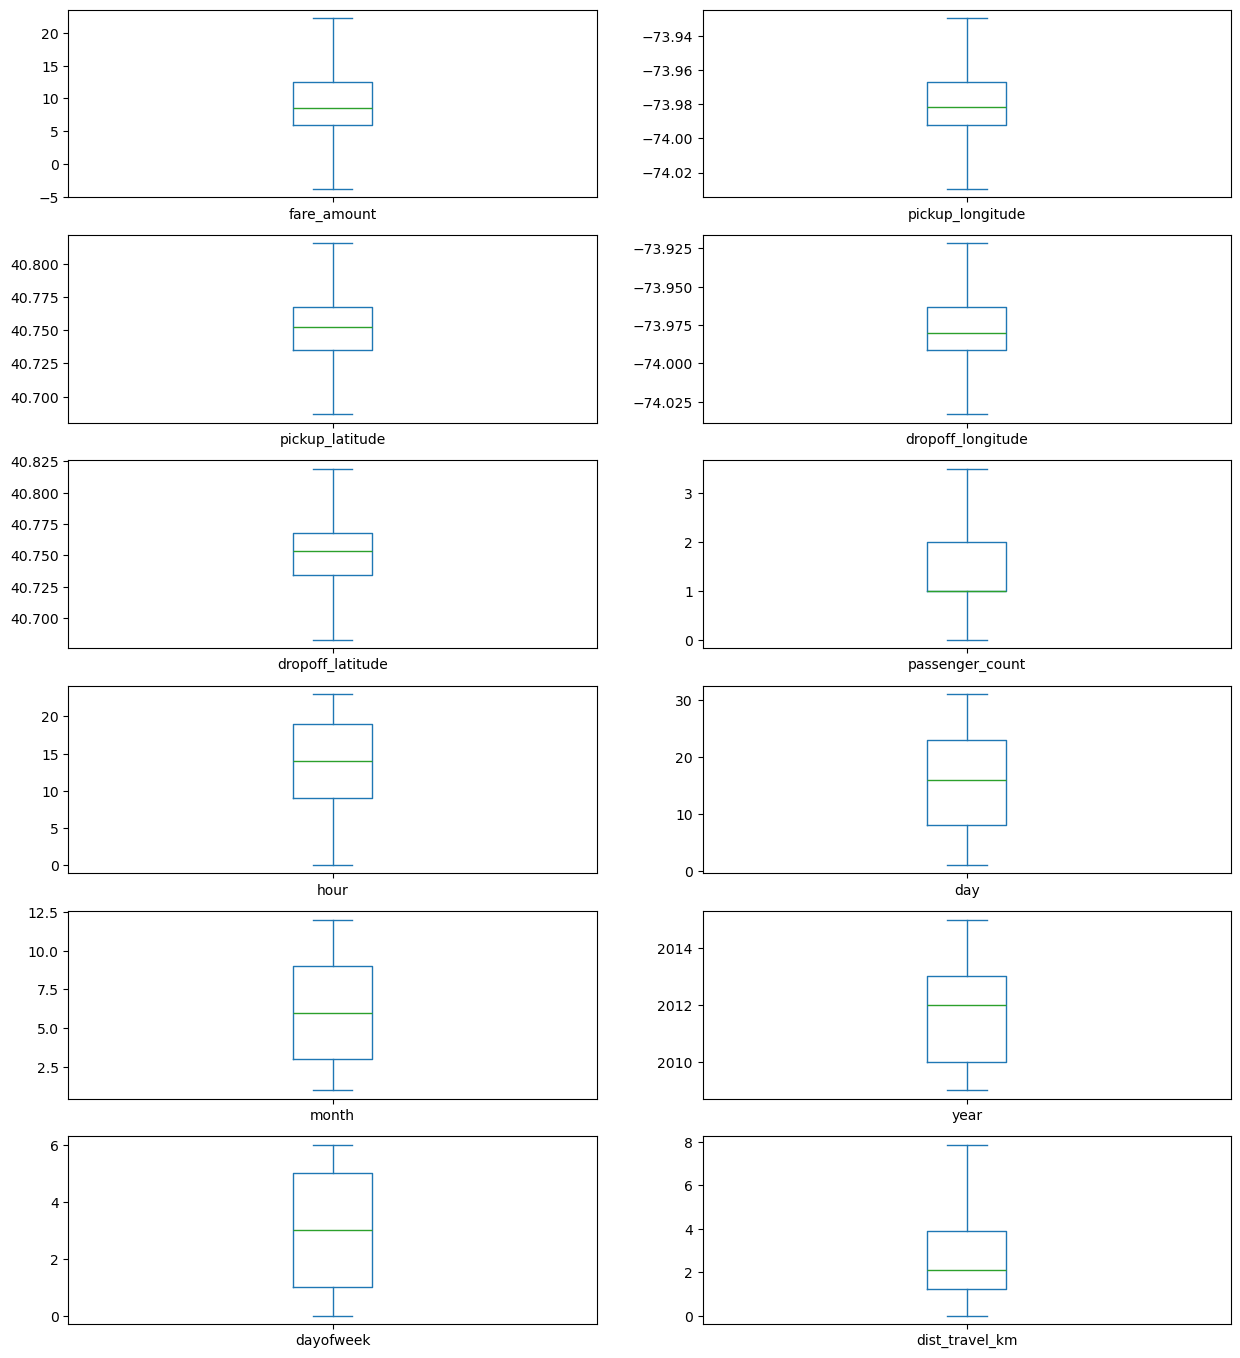

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
fare_amount,1.000000,0.148760,-0.111811,0.226706,-0.123299,0.018813,-0.021251,-0.000346,0.028541,0.140253,0.013377,0.843196
pickup_longitude,0.148760,1.000000,0.267436,0.423873,0.070832,-0.009680,0.011429,-0.001686,0.000598,0.005577,-0.025165,0.093918
pickup_latitude,-0.111811,0.267436,1.000000,0.049500,0.516743,-0.009821,0.032958,-0.003962,-0.004859,-0.010277,-0.043155,-0.046126
dropoff_longitude,0.226706,0.423873,0.049500,1.000000,0.243987,-0.007398,-0.044485,-0.000661,0.000596,0.013659,-0.002121,0.197616
dropoff_latitude,-0.123299,0.070832,0.516743,0.243987,1.000000,-0.004869,0.016306,-0.002511,-0.003564,-0.008384,-0.030320,-0.035899
passenger_count,0.018813,-0.009680,-0.009821,-0.007398,-0.004869,1.000000,0.021749,0.008148,0.007982,-0.008199,0.049642,0.013365
hour,-0.021251,0.011429,0.032958,-0.044485,0.016306,0.021749,1.000000,0.002323,-0.003086,0.002641,-0.090308,-0.037209
day,-0.000346,-0.001686,-0.003962,-0.000661,-0.002511,0.008148,0.002323,1.000000,-0.020307,-0.009517,0.008337,-0.000641
month,0.028541,0.000598,-0.004859,0.000596,-0.003564,0.007982,-0.003086,-0.020307,1.000000,-0.118543,-0.008355,0.010419
year,0.140253,0.005577,-0.010277,0.013659,-0.008384,-0.008199,0.002641,-0.009517,-0.118543,1.000000,0.011651,0.023606


In [16]:
#Boxplot shows that dataset is free from outliers
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) 
plt.show()

#Function to find the correlation
corr = df.corr() 
corr

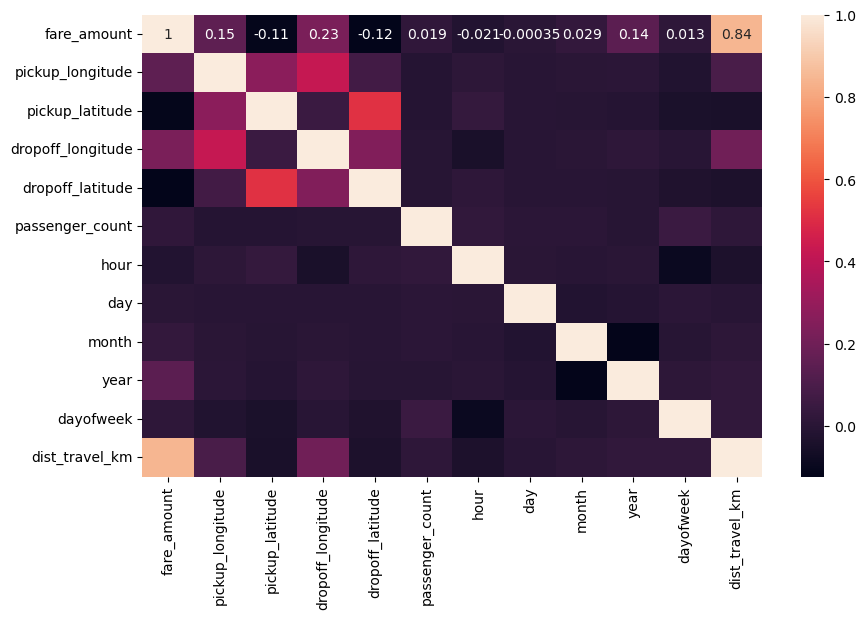

In [17]:
fig,axis = plt.subplots(figsize = (10,6))
sns.heatmap(df.corr(),annot = True) 


df_x = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year','dayofweek','dist_travel_km']]
df_y = df['fare_amount']
# Dividing the dataset into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=1)

In [18]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,4.50,-73.929595,40.721319,-73.921829,40.712278,1.0,17,15,6,2009,0,1.030764
1,16.90,-74.016048,40.711303,-73.979268,40.782004,1.0,16,5,1,2010,1,7.855244
2,5.70,-73.982738,40.761270,-73.991242,40.750562,2.0,0,18,8,2011,3,1.389525
3,7.70,-73.987130,40.733143,-73.991567,40.758092,1.0,4,21,4,2012,5,2.799270
4,5.30,-73.968095,40.768008,-73.956655,40.783762,1.0,7,9,3,2010,1,1.999157
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,8.90,-73.989939,40.729423,-73.990683,40.758504,1.0,1,24,3,2011,3,3.234267
199996,14.10,-74.005021,40.739912,-73.961319,40.766701,3.0,21,20,6,2012,2,4.735418
199997,6.90,-73.993203,40.752092,-74.003508,40.732282,1.0,19,4,8,2012,5,2.367682
199998,18.00,-73.994411,40.750884,-73.978532,40.785599,1.0,18,26,11,2013,1,4.085196


In [19]:
from sklearn.linear_model import LinearRegression

# initialize the linear regression model
reg = LinearRegression()

# Train the model with our training data
reg.fit(x_train, y_train)

y_pred_lin = reg.predict(x_test)

In [21]:
import pandas as pd
from sklearn import metrics
from sklearn.metrics import r2_score

# Define the columns for the DataFrame
cols = ['Model', 'RMSE', 'R-Squared']

# Create an empty list to store the data
data = []

# Define the metrics for Linear Regression
reg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lin))
reg_squared = r2_score(y_test, y_pred_lin)
linear_regression_metrics = {'Model': "Linear Regression", 'RMSE': reg_RMSE, 'R-Squared': reg_squared}

# Append the metrics to the data list
data.append(linear_regression_metrics)

In [22]:
# Create a DataFrame from the list of dictionaries
result_tabulation = pd.DataFrame(data)

# Reorder the columns to match the desired order
result_tabulation = result_tabulation[cols]

# Print the result table
print(result_tabulation)

               Model      RMSE  R-Squared
0  Linear Regression  2.735086   0.748545


In [23]:
# Function to calculate the travel distance from the longitudes and latitudes
from math import *

def distance_formula(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []

    for pos in range(len(longitude1)):
        lon1, lan1, lon2, lan2 = map(radians, [longitude1[pos], latitude1[pos], longitude2[pos], latitude2[pos]])
        dist_lon = lon2 - lon1
        dist_lan = lan2 - lan1

        a = sin(dist_lan/2)**2 + cos(lan1) * cos(lan2) * sin(dist_lon/2)**2

        # Radius of earth = 6371
        c = 2 * asin(sqrt(a)) * 6371
        travel_dist.append(c)

    return travel_dist

In [26]:
# Input from the user
pickup_longitude = float(input("Enter the pickup longitude: "))
pickup_latitude = float(input("Enter the pickup latitude: "))
dropoff_longitude = float(input("Enter the dropoff longitude: "))
dropoff_latitude = float(input("Enter the dropoff latitude: "))
passenger_count = int(input("Enter the number of passengers: "))
hour = int(input("Enter the hour of the day (0-23): "))
day = int(input("Enter the day of the month: "))
month = int(input("Enter the month (1-12): "))
year = int(input("Enter the year: "))
dayofweek = int(input("Enter the day of the week (0-6, where 0 is Monday): "))
dist_travel_km = float(input("Enter the travel distance in kilometers: "))

# Predict fare amount using Linear Regression
fare_lr = reg.predict([[pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count, hour, day, month, year, dayofweek, dist_travel_km]])

print("Predicted fare amount using Linear Regression:", fare_lr[0])

Enter the pickup longitude:  -73.982683
Enter the pickup latitude:  40.742104
Enter the dropoff longitude:  -73.964630
Enter the dropoff latitude:  40.789620
Enter the number of passengers:  3
Enter the hour of the day (0-23):  15
Enter the day of the month:  12
Enter the month (1-12):  4
Enter the year:  2024
Enter the day of the week (0-6, where 0 is Monday):  0
Enter the travel distance in kilometers:  5


Predicted fare amount using Linear Regression: 18.386078452216225


C:\ml\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


C:\ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


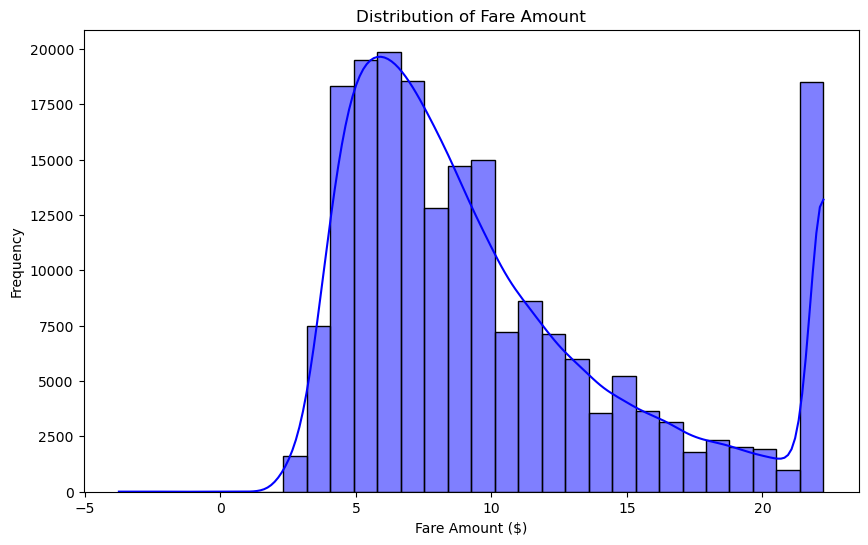

In [27]:
# Visualize the distribution of fare_amount
plt.figure(figsize=(10, 6))
sns.histplot(df['fare_amount'], bins=30, kde=True, color='blue')
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.show()

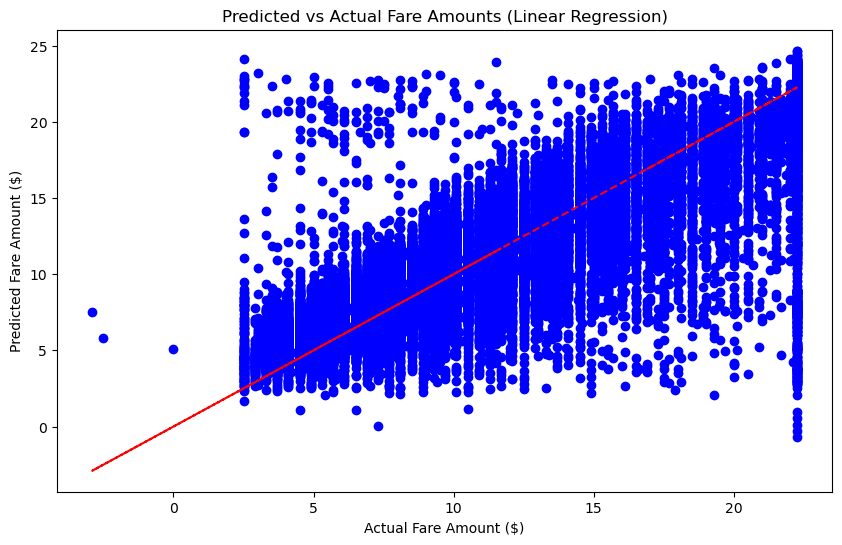

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lin, color='blue')
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.title('Predicted vs Actual Fare Amounts (Linear Regression)')
plt.xlabel('Actual Fare Amount ($)')
plt.ylabel('Predicted Fare Amount ($)')
plt.show()

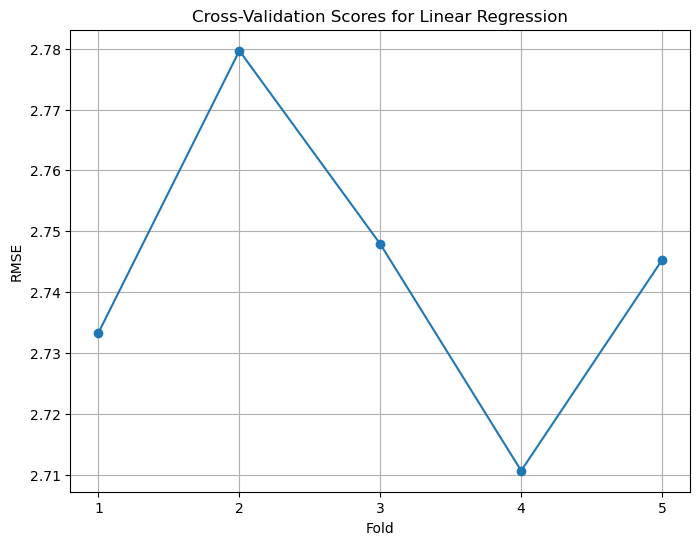

In [30]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(reg,df_x, df_y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive RMSE scores
cv_rmse_scores = np.sqrt(-cv_scores)

# Plot cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='-')
plt.title('Cross-Validation Scores for Linear Regression')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.xticks(range(1, 6))
plt.grid(True)
plt.show()